In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from myrcparams import *
from figparams import *

##Compute differences between SWB calculated runoff and USGS WaterWatch values

In [2]:
ww_df = pd.read_csv('waterwatch_runoff.csv', index_col=['Year'])
swb_df = pd.read_csv('swb_runoff.csv', index_col=['Year'])
df = swb_df-ww_df


In [3]:
df

,0305,0306,0307,0308,0309,0310,0311,0312,0313,0314,0315,0316,0317
Year,,,,,,,,,,,,,
1995,-6.862082,-5.509560,-3.428135,-1.438930,5.571852,1.897160,-0.429053,-5.144326,-7.169206,-7.346355,-2.709136,-4.881142,-1.362241
1996,-6.720481,-5.329665,-1.206238,-1.018337,5.904592,1.488481,4.883642,-0.276926,-7.807894,-13.091754,-9.271124,-8.622933,-2.745267
1997,-2.861229,-1.300675,-0.042855,4.886318,9.012098,9.187201,1.110003,-1.215836,-5.403263,-6.077103,-8.073598,-10.524320,-4.156222
1998,-7.360630,-9.691853,-9.044279,-3.932342,-0.145033,-4.310738,-4.033286,-5.056215,-11.803450,-10.565849,-7.744377,-6.345539,-2.336914
1999,-0.627226,0.577330,2.984777,3.203133,13.750781,5.484046,3.609832,-0.117015,-2.923218,-7.458070,-2.991910,-6.225062,0.199696
2000,0.027425,1.470882,3.575175,2.810141,9.104121,5.871518,6.282390,2.294432,0.450419,0.414215,1.794613,1.298048,3.785897
2001,-1.824192,-1.985221,-1.721162,7.635662,11.707598,9.521552,1.926813,-0.852864,-3.879421,-6.455014,-3.720269,-4.662161,-2.156331
2002,4.282549,6.455936,6.551859,4.771454,6.128804,7.994951,9.733763,6.154303,2.792496,0.115955,-0.743264,-3.801553,-1.327006
2003,-11.076377,-7.717137,-7.090527,-4.250395,4.574212,-2.243367,-2.077511,-5.784209,-10.023443,-12.871836,-11.688020,-9.284692,-7.949365


##Draw a boxplot of these differences

C:\Anaconda_x64\lib\site-packages\matplotlib\backends\backend_pdf.py:1100: UserWarning: 'univers-condensed.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


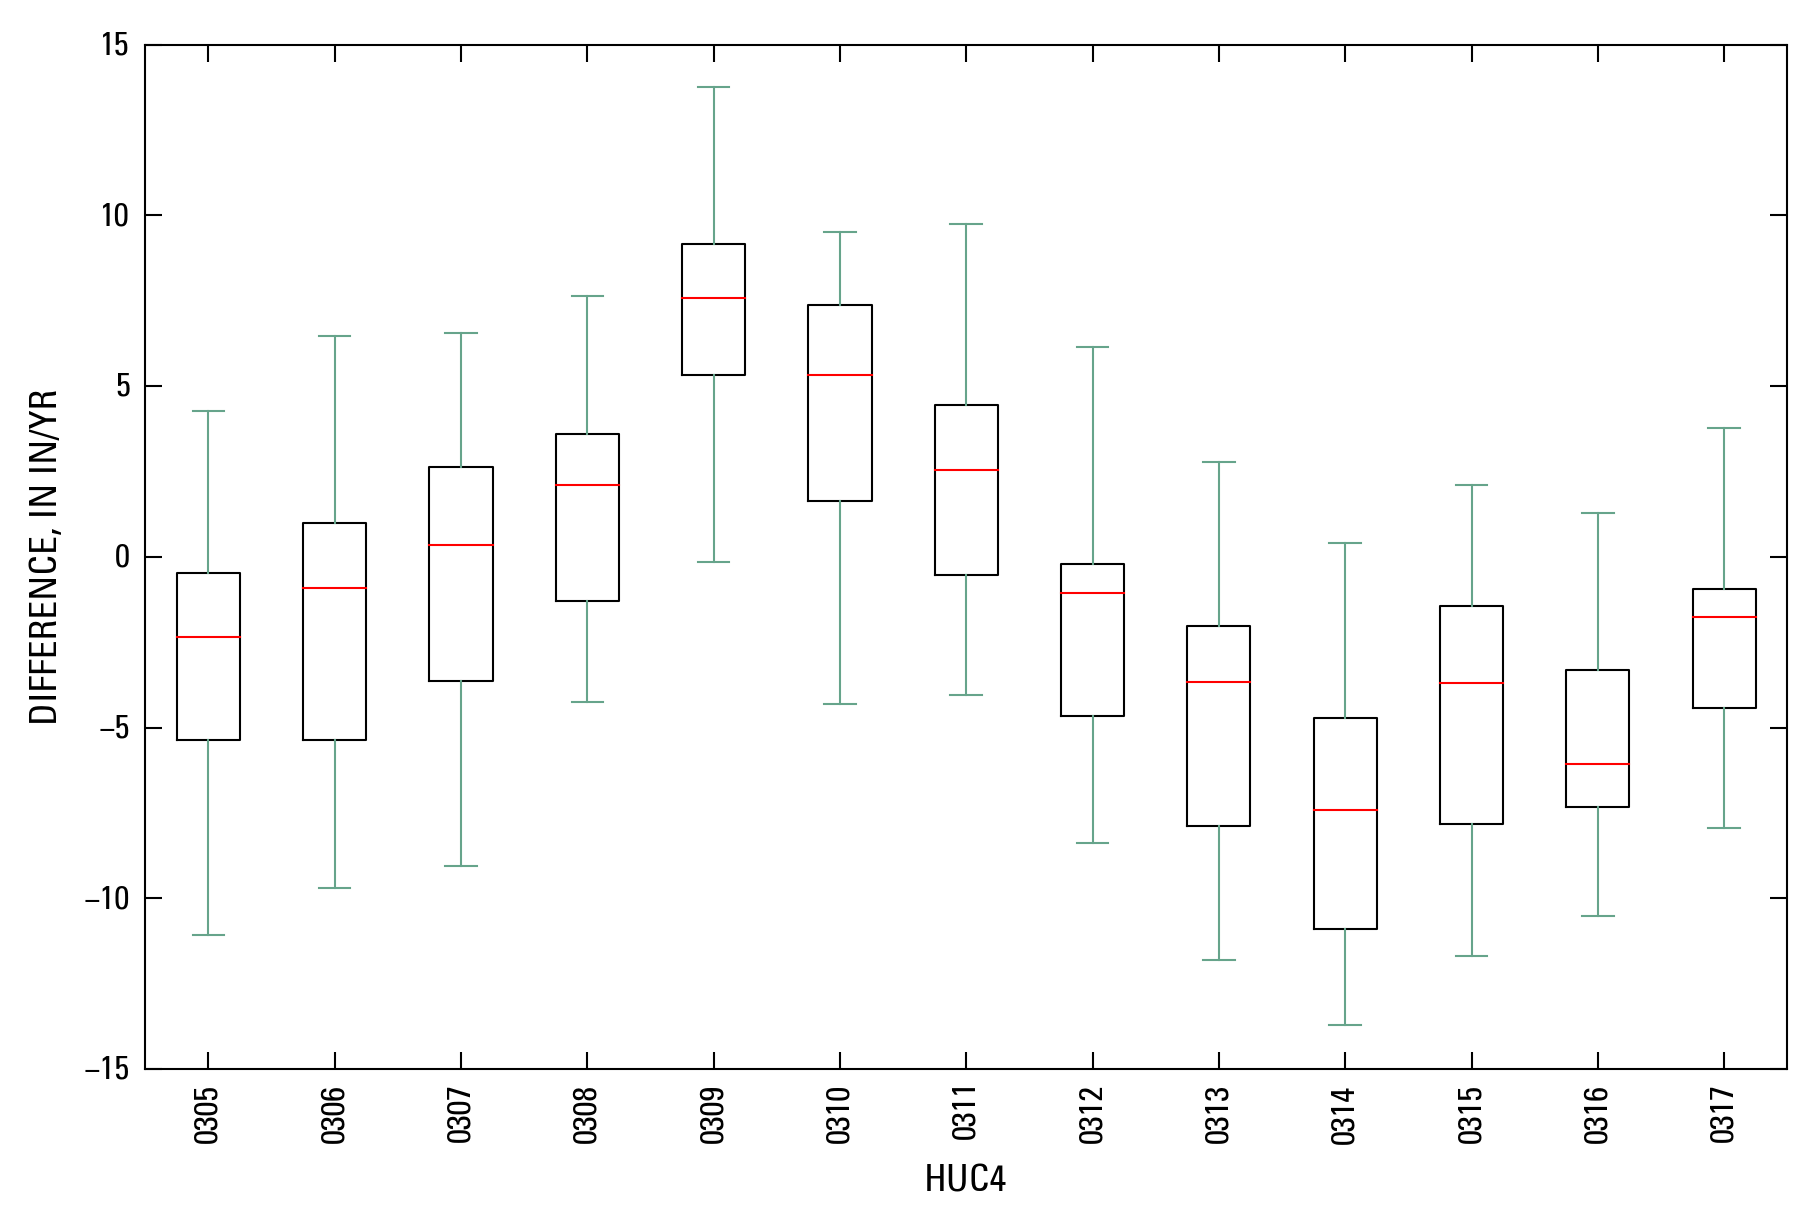

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel('HUC4')
ax.set_ylabel('DIFFERENCE, IN IN/YR')
bp = df.boxplot(ax=ax, return_type='dict')

plt.setp(bp['boxes'], color='black', linewidth=linewidth)
plt.setp(bp['whiskers'], color=light_colors['green'], linewidth=linewidth, linestyle='-')
plt.setp(bp['caps'], color=light_colors['green'], linewidth=linewidth)
plt.setp(bp['medians'], linewidth=linewidth)
plt.setp(bp['fliers'], color=light_colors['green'], marker='+')

ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.xticks(rotation='vertical')

fig.savefig('RunoffDifference.pdf', dpi=dpi)

plt.tight_layout()
plt.show()
plt.close()

##Compute average slope of each HUC4 unit

In [5]:
import arcpy
arcpy.env.overwriteOutput = True

mask = r'runoff.gdb\huc4'
mask_lyr = r'in_memory\mask_lyr'
arcpy.MakeFeatureLayer_management(mask, mask_lyr)

slp = r'dem_slp.gdb\slp_ft'
slp_lyr = r'in_memory\slp_lyr'
arcpy.MakeRasterLayer_management(slp, slp_lyr)

arcpy.CheckOutExtension("Spatial")
tbl = r'in_memory\tbl'
arcpy.sa.ZonalStatisticsAsTable(mask_lyr, 'HUC_4', slp_lyr, tbl, statistics_type='MIN_MAX_MEAN')

<geoprocessing server result object at 0x183fb9b0>

##View output from Zonal statistics analysis of slope raster

In [6]:
results = list()
with arcpy.da.SearchCursor(tbl, '*') as rows:
    for row in rows:
        results.append(row)
        
field_names = [f.name for f in arcpy.ListFields(tbl)]
slp_df = pd.DataFrame(data=results, columns=field_names)
slp_df = slp_df.sort(['HUC_4'])
slp_df = slp_df.set_index(['HUC_4'])
slp_df = slp_df[['MEAN']]
slp_df = slp_df.rename(columns={'MEAN': 'MEAN_SLP'})


In [7]:
slp_df

,MEAN_SLP
HUC_4,
0305,9.991093
0306,8.914654
0307,6.327507
0308,1.811941
0309,0.459209
0310,1.748031
0311,2.414719
0312,4.525944
0313,8.828090


##Compute mean difference and percent difference by HUC4 unit

In [9]:
avg_ww_df = pd.DataFrame(ww_df.mean(), columns=['MEAN']).rename(columns={'MEAN': 'ROFF_WW'})
avg_swb_df = pd.DataFrame(swb_df.mean(), columns=['MEAN']).rename(columns={'MEAN': 'ROFF_SWB'})

avg_df = slp_df.copy()
avg_df['ROFF_WW'] = ww_df.mean()
avg_df['ROFF_SWB'] = swb_df.mean()
avg_df['MEAN_DIF'] = avg_df['ROFF_SWB']-avg_df['ROFF_WW']
avg_df['MEAN_PCT_DIF'] = (avg_df['MEAN_DIF']/avg_df['ROFF_WW'])*100.


In [10]:
avg_df

,MEAN_SLP,ROFF_WW,ROFF_SWB,MEAN_DIF,MEAN_PCT_DIF
HUC_4,,,,,
0305,9.991093,13.18750,10.398044,-2.789456,-21.152273
0306,8.914654,12.15000,10.307684,-1.842316,-15.163098
0307,6.327507,11.72500,11.180416,-0.544584,-4.644640
0308,1.811941,11.89375,13.308836,1.415086,11.897731
0309,0.459209,10.25625,17.668246,7.411996,72.268087
0310,1.748031,10.32500,14.507720,4.182720,40.510607
0311,2.414719,10.34375,12.452269,2.108519,20.384469
0312,4.525944,14.18750,12.398095,-1.789405,-12.612549
0313,8.828090,16.38125,11.845914,-4.535336,-27.686144


##Compute averages by HUC4 region (north vs. south)

In [11]:
hucs_n = ['0305', '0306', '0307', '0312', '0313', '0314', '0315', '0316', '0317']
hucs_s = ['0308', '0309', '0310', '0311']
print 'Averages for northern HUCs\n{}'.format(avg_df.loc[hucs_n].mean().to_string())
print 'MAX_DIF\t\t{}'.format(avg_df.loc[hucs_n]['MEAN_DIF'].max())
print 'MIN_DIF\t\t{}'.format(avg_df.loc[hucs_n]['MEAN_DIF'].min())
print 'MAX_PCT_DIF\t{}'.format(avg_df.loc[hucs_n]['MEAN_PCT_DIF'].max())
print 'MIN_PCT_DIF\t{}\n'.format(avg_df.loc[hucs_n]['MEAN_PCT_DIF'].min())

print 'Average for southern HUCs\n{}'.format(avg_df.loc[hucs_s].mean().to_string())
print 'MAX_DIF\t\t{}'.format(avg_df.loc[hucs_s]['MEAN_DIF'].max())
print 'MIN_DIF\t\t{}'.format(avg_df.loc[hucs_s]['MEAN_DIF'].min())
print 'MAX_PCT_DIF\t{}'.format(avg_df.loc[hucs_s]['MEAN_PCT_DIF'].max())
print 'MIN_PCT_DIF\t{}\n'.format(avg_df.loc[hucs_s]['MEAN_PCT_DIF'].min())

Averages for northern HUCs
MEAN_SLP         8.852529
ROFF_WW         16.635417
ROFF_SWB        13.227779
MEAN_DIF        -3.407638
MEAN_PCT_DIF   -19.245480
MAX_DIF		-0.544584004734
MIN_DIF		-7.36852069222
MAX_PCT_DIF	-4.64463969922
MIN_PCT_DIF	-33.7618359323

Average for southern HUCs
MEAN_SLP         1.608475
ROFF_WW         10.704688
ROFF_SWB        14.484268
MEAN_DIF         3.779580
MEAN_PCT_DIF    36.265224
MAX_DIF		7.41199568582
MIN_DIF		1.41508633799
MAX_PCT_DIF	72.2680871257
MIN_PCT_DIF	11.8977306399



##Perform linear regression on mean slope and mean percent difference.

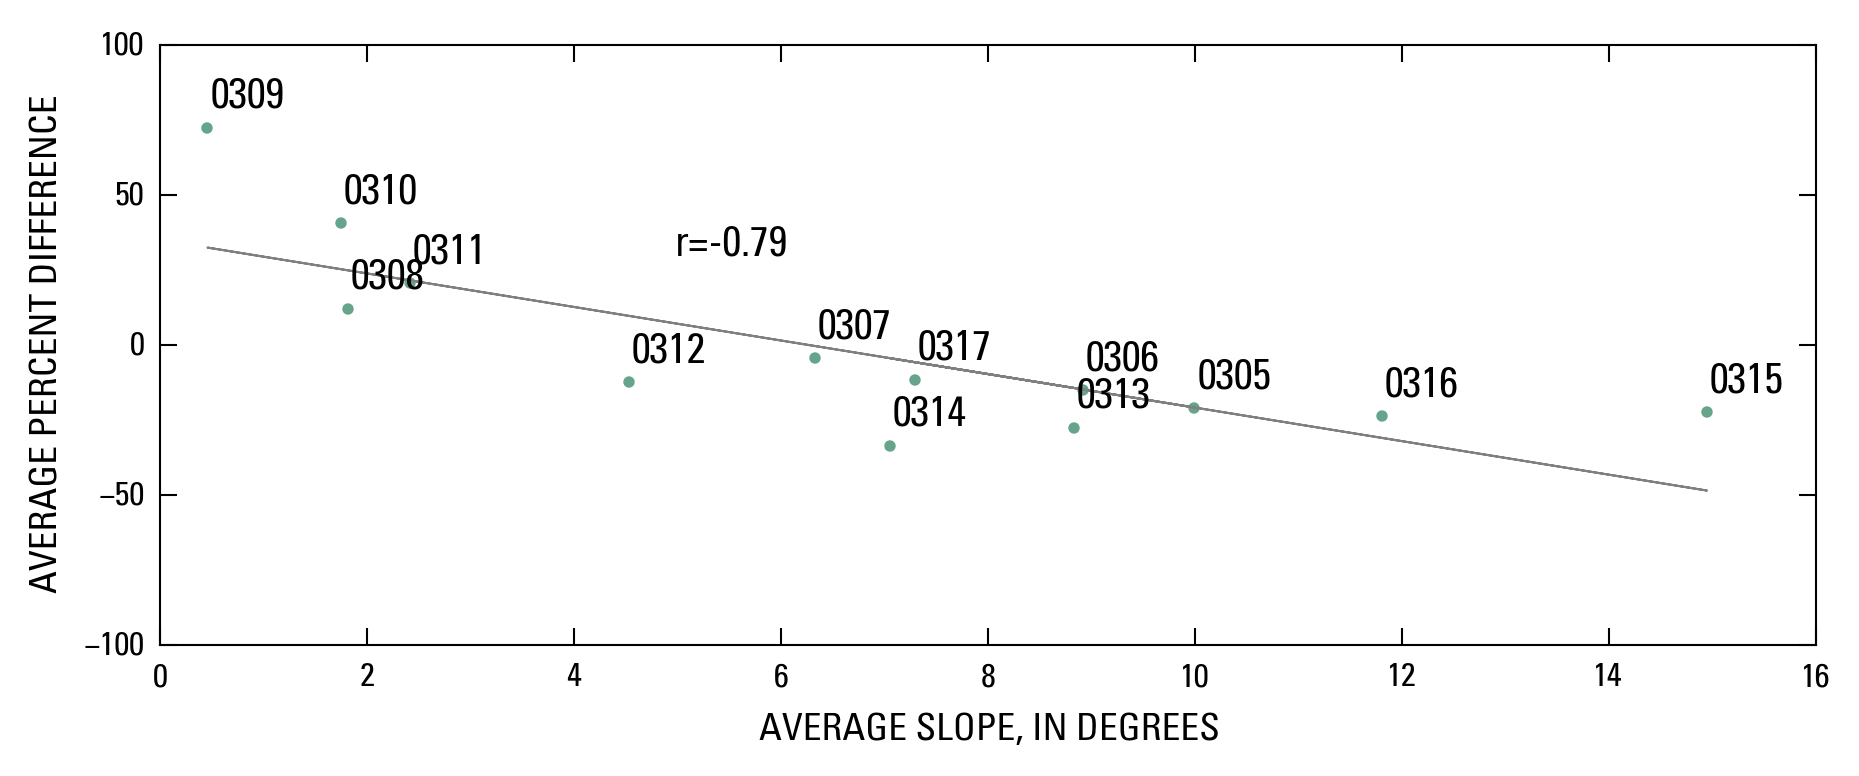

In [12]:
x = avg_df['MEAN_SLP'].values
y = avg_df['MEAN_PCT_DIF'].values
labels = avg_df.index.values

fig, ax = plt.subplots(figsize=(7.125, 2.5))
plt.scatter(x, y, marker='.', color=light_colors['green'])
plt.xlim([0,16])
plt.ylim([-100, 100])

for label, x_pnt, y_pnt in zip(labels, x, y):
    plt.annotate(label, xy = (x_pnt, y_pnt), xytext = (1, 5), textcoords = 'offset points', size=mediumfontsize)
    
m, b, r_value, p_value, std_err = stats.linregress(x, y)
ax.plot(x, m*x +b, color='gray', linewidth=linewidth)
ax.text(5, 30, 'r={:1.2f}'.format(r_value), size=mediumfontsize)

ax.set_xlabel('AVERAGE SLOPE, IN DEGREES')
ax.set_ylabel('AVERAGE PERCENT DIFFERENCE')

fig.savefig('PercentDifferenceVsSlope.pdf', dpi=dpi)

plt.show()
plt.close()